In [ ]:
import pandas as pd
import matplotlib
import matplotlib. pyplot as plt
import re

In [ ]:
df = pd.read_csv('/content/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
 df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
 df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

# Number of Rows and coloum in the data

In [ ]:
print(f"{'Number of rows in dataset:':10}{df.shape[0]}")
print(f"{'Number of coloum in dataset:':10}{df.shape[1]}")

Number of rows in dataset:800
Number of coloum in dataset:13


# Cleaning data

In [ ]:
help(df.isna().any)

Help on method any in module pandas.core.generic:

any(*, axis: 'Axis' = 0, bool_only=None, skipna: 'bool_t' = True, **kwargs) method of pandas.core.frame.DataFrame instance
    Return whether any element is True, potentially over an axis.
    
    Returns False unless there is at least one element within a series or
    along a Dataframe axis that is True or equivalent (e.g. non-zero or
    non-empty).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns', None}, default 0
        Indicate which axis or axes should be reduced. For `Series` this parameter
        is unused and defaults to 0.
    
        * 0 / 'index' : reduce the index, return a Series whose index is the
          original column labels.
        * 1 / 'columns' : reduce the columns, return a Series whose index is the
          original index.
        * None : reduce all axes, return a scalar.
    
    bool_only : bool, default None
        Include only boolean columns. If None, will attempt to us

In [ ]:
df[df.isna().any(axis = 1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [ ]:
df = df.dropna()
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    object
 3   Type 2      414 non-null    object
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  Legendary   414 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 42.5+ KB


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,376.565217,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628
std,212.840297,120.849502,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010
min,1.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,355.000000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000
50%,378.000000,475.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000
75%,560.750000,529.500000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000


In [ ]:
df[['Total', 'HP']]

,Total,HP
0,318,45
1,405,60
2,525,80
3,625,80
6,534,78
...,...,...
795,600,50
796,700,50
797,600,80
798,680,80


In [ ]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [ ]:
df.loc[df['Legendary'] == True]
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df.loc[(df['Type 1']=='Grass') & (df['Type 2']=='Poison')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
75,69,Bellsprout,Grass,Poison,300,50,75,35,70,30,40,1,False
76,70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1,False
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False


In [ ]:
df.loc[((df['Type 1']=="Grass") | (df['Type 2']=="Poison")) & (df["HP"] > 70)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
79,73,Tentacruel,Water,Poison,515,80,70,65,80,120,100,1,False
111,103,Exeggutor,Grass,Psychic,520,95,95,85,125,65,55,1,False
204,189,Jumpluff,Grass,Flying,460,75,55,70,55,95,110,2,False
298,275,Shiftry,Grass,Dark,480,90,100,60,90,60,80,3,False
390,357,Tropius,Grass,Flying,460,99,68,83,72,87,51,3,False
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4,False


In [ ]:
df1 = df.copy()
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df1 = df.reset_index(drop= True)
df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
410,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
411,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
412,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df1 = df.reset_index(drop= True, inplace = True)
df1

In [ ]:
df.loc[df["Name"].str.contains("^pi[a-z]*", flags=re.I, regex=True)].reset_index(drop=True)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False
1,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False
2,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False
3,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
4,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
5,221,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False
6,499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5,False
7,519,Pidove,Normal,Flying,264,50,55,50,36,30,43,5,False


In [ ]:
df = df.copy()
df.loc[df["Total"] > 500, ['Generation','Legendary']] = ' Test Message'
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Test Message,Test Message
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Test Message,Test Message
4,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,Test Message,Test Message
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,Test Message,Test Message
410,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,Test Message,Test Message
411,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,Test Message,Test Message
412,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,Test Message,Test Message


In [ ]:
df = df.copy()
df.loc[df['Total'] > 500, ['Generation', 'Legendary']] = [True , 100]
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,True,100
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True,100
4,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True,100
410,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True,100
411,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True,100
412,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True,100


In [ ]:
df.groupby('Type 1').mean(numeric_only=True)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,,
Bug,325.711538,408.096154,58.134615,77.711538,75.730769,58.634615,71.711538,66.173077
Dark,486.333333,450.285714,69.809524,88.190476,74.523810,71.476190,73.238095,73.047619
Dragon,455.857143,622.380952,94.571429,122.571429,96.476190,116.238095,97.857143,94.666667
Electric,458.058824,490.823529,59.470588,68.882353,83.764706,108.882353,85.352941,84.470588
Fairy,322.000000,475.000000,70.000000,45.000000,90.000000,100.000000,110.000000,60.000000
Fighting,456.428571,477.857143,66.142857,95.857143,75.142857,82.571429,69.857143,88.285714
Fire,384.541667,511.583333,78.291667,92.166667,78.708333,105.458333,80.166667,76.791667
Flying,714.500000,390.000000,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000
Ghost,525.681818,444.090909,71.318182,72.545455,78.090909,82.045455,70.590909,69.500000


In [ ]:
df.groupby(['Type 1', 'Type 2']).count()

#  Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Bug    Electric   2     2      2   2       2        2        2        2   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       2     2      2   2       2        2        2        2   
       Flying    14    14     14  14      14       14       14       14   
       Ghost      1     1      1   1       1        1        1        1   
...              ..   ...    ...  ..     ...      ...      ...      ...   
Water  Ice        3     3      3   3       3        3        3        3   
       Poison     3     3      3   3       3        3        3        3   
       Psychic    5     5      5   5       5        5        5        5   
       Rock       4     4      4   4       4        4        4        4   
       Steel      1     1      1   1       1        1        1        1   

                 Speed  Generation  Legendary  
Type 1 Type 2                                  
Bug    Electric      2           2          2  
       Fighting      2           2          2  
       Fire          2           2          2  
       Flying       14          14         14  
       Ghost         1           1          1  
...                ...         ...        ...  
Water  Ice           3           3          3  
       Poison        3           3          3  
       Psychic       5           5          5  
       Rock          4           4          4  
       Steel         1           1          1  

[136 rows x 11 columns]

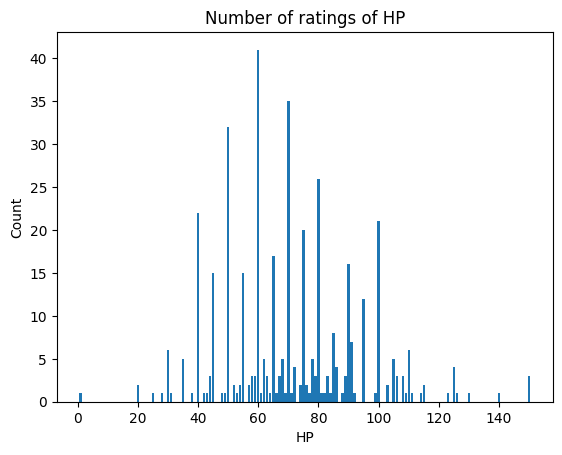

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df['HP'].value_counts().index, df['HP'].value_counts().values)
plt.xlabel('HP')
plt.ylabel('Count')
plt.title('Number of ratings of HP')
plt.show()

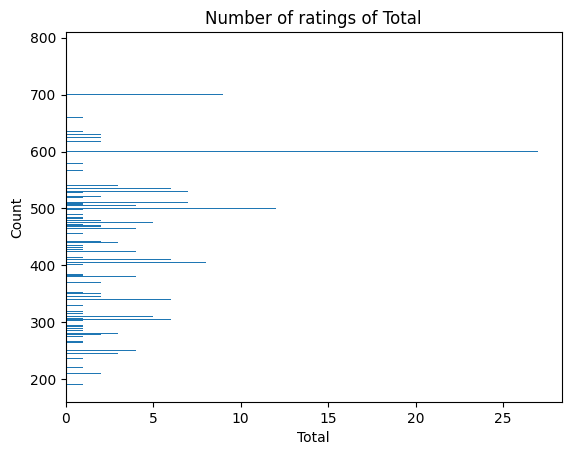

In [ ]:
plt.barh(df['Total'].value_counts().index, df['Total'].value_counts().values) # Use 'value_counts', not 'values_counts'
plt.xlabel('Total')
plt.ylabel('Count')
plt.title('Number of ratings of Total')
plt.show()